# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [ ]:
!pip uninstall -y pandas-profiling
!pip install pandas-profiling[notebook,html]

In [11]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv("google-play-store.csv")

In [2]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [3]:
profile

In [12]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

In [14]:
df.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df)
imputed_train_df = imp_mean.transform(df)

In [41]:
imputed_train_df = pd.DataFrame(imputed_train_df, columns=df.columns)

In [42]:
imputed_train_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
imputed_train_df['Last Updated'] = pd.to_datetime(imputed_train_df['Last Updated'],format='%B %d, %Y',errors='coerce').astype('str')

def split_mul(data):
    try:
        data=list(map(int,data.split('-')))
        return data[0]+(data[1]*12)+data[2]
    except:
        return "Nan"
imputed_train_df['Last Updated'] = [split_mul(x) for x in imputed_train_df['Last Updated']]

imputed_train_df["Android Ver"] = imputed_train_df["Android Ver"].str.split(n=1, expand=True)

def deal_with_abnormal_strings(data):
    data[data.str.isnumeric()==False]=-1
    data=data.astype(np.float32)
    return data

imputed_train_df.Installs = [x.strip().replace('+', '').replace(',','') for x in imputed_train_df.Installs]
imputed_train_df.Installs = deal_with_abnormal_strings(imputed_train_df.Installs)

imputed_train_df.Size = [x.strip().replace('M', '').replace(',','') for x in imputed_train_df.Size]

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        try:
            val=val.split('.')
            return float(val[0]+'.'+val[1])
        except:
            return np.nan

corr_cat=['Rating','Reviews','Size','Installs','Current Ver','Android Ver','Last Updated']
for i in corr_cat:
    imputed_train_df[i]=imputed_train_df[i].apply(lambda x: convert_float(x))

In [44]:
imputed_train_df.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,2037.0,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2045.0,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,2115.0,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,2098.0,NaN,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,2110.0,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0,Everyone,Art & Design,2079.0,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0,Everyone,Art & Design,2092.0,1.1,4.0


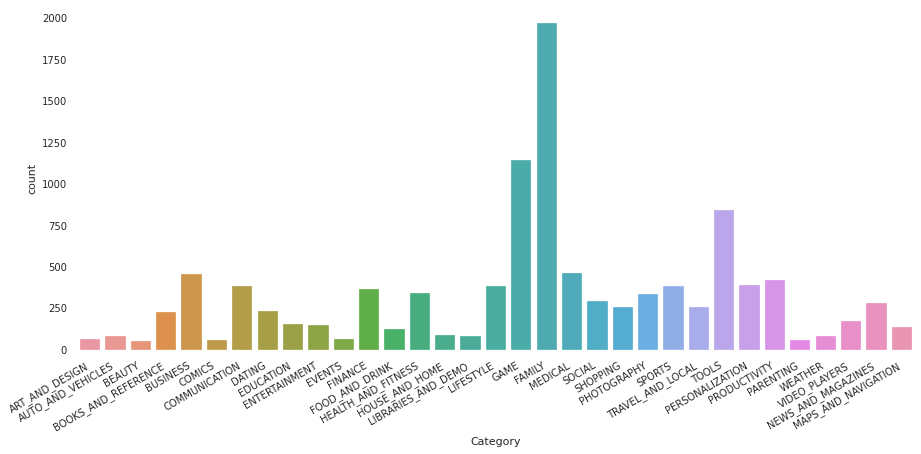

,Category,Count
11,FAMILY,1968
14,GAME,1144
29,TOOLS,841
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
fig.autofmt_xdate()
countplot=sns.categorical.countplot(imputed_train_df.Category,ax=ax)
plt.show(countplot)


top_cat=imputed_train_df.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

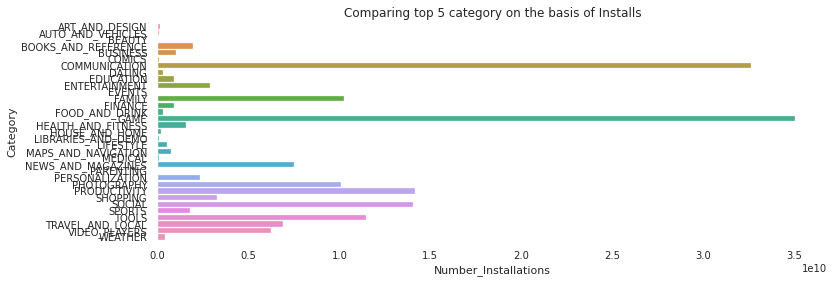

In [46]:
cat=top_cat.Category.tolist()
data_top6=imputed_train_df.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Number_Installations')
data=imputed_train_df.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')

#Comparing top 5 category on the basis of 'Installs'
fig = plt.figure(figsize=(12,4))
title=plt.title('Comparing top 5 category on the basis of Installs')
bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
plt.show(bar)

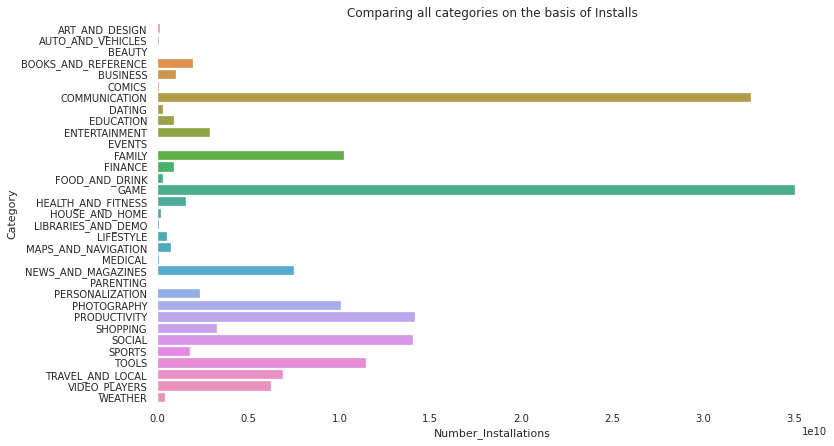

In [47]:
#Comparing all categoryies on the basis of 'Installs'
fig = plt.figure(figsize=(12,7))
title=plt.title('Comparing all categories on the basis of Installs')
bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
plt.show(bar)

In [50]:
imputed_train_df.to_csv('new.csv', header=True, index=False)